 Training and Evaluating a Random Forest Classifier

Model Evaluation Metrics:
Accuracy: 0.80
Precision: 0.38
Recall: 0.02
F1 Score: 0.03
ROC-AUC Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2416
           1       0.38      0.02      0.03       584

    accuracy                           0.80      3000
   macro avg       0.60      0.51      0.46      3000
weighted avg       0.72      0.80      0.72      3000



C:\Users\surya\AppData\Local\Temp\ipykernel_30632\445196499.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


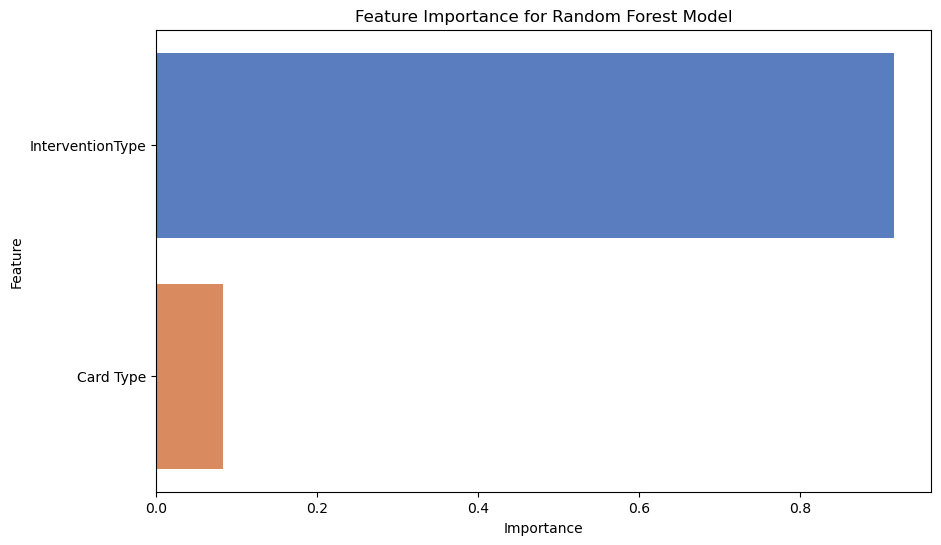

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data= pd.read_csv('C:/Users/surya/Downloads/Train_data.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])
data['InterventionType'] = label_encoder.fit_transform(data['InterventionType'])

# Select features and target variable
features = ['Card Type', 'InterventionType']
target = 'Exited'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)

# Calculate feature importances
feature_importances = model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Handling Class Imbalance in Customer Churn Prediction Using SMOTE, RandomUnderSampler, and SMOTEENN

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [7]:
# Example: Creating interaction terms
data['Card_Intervention'] = data['Card Type'] * data['InterventionType']


In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [10]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {cv_scores.mean()}')


Cross-Validation F1 Scores: [0. 0. 0. 0. 0.]
Average Cross-Validation F1 Score: 0.0


Random Forest Classifier for Customer Churn Prediction with SMOTE and Hyperparameter Tuning

Model Evaluation Metrics:
Accuracy: 0.60
Precision: 0.59
Recall: 0.57
F1 Score: 0.58
ROC-AUC Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      2463
           1       0.59      0.57      0.58      2315

    accuracy                           0.60      4778
   macro avg       0.60      0.60      0.60      4778
weighted avg       0.60      0.60      0.60      4778



C:\Users\surya\AppData\Local\Temp\ipykernel_30632\3495333961.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


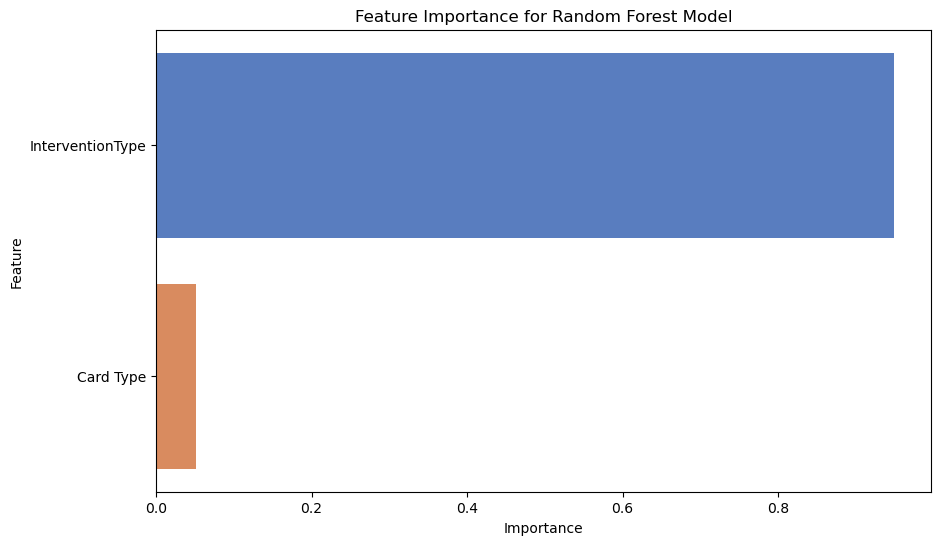

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])
data['InterventionType'] = label_encoder.fit_transform(data['InterventionType'])

# Select features and target variable
features = ['Card Type', 'InterventionType']
target = 'Exited'

X = data[features]
y = data[target]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)

# Calculate feature importances
feature_importances = best_model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Implementation of Further Improvements


Improved Model Evaluation Metrics:
Accuracy: 0.60
Precision: 0.59
Recall: 0.61
F1 Score: 0.60
ROC-AUC Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      2463
           1       0.59      0.61      0.60      2315

    accuracy                           0.60      4778
   macro avg       0.60      0.60      0.60      4778
weighted avg       0.60      0.60      0.60      4778



C:\Users\surya\AppData\Local\Temp\ipykernel_30632\1843021861.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


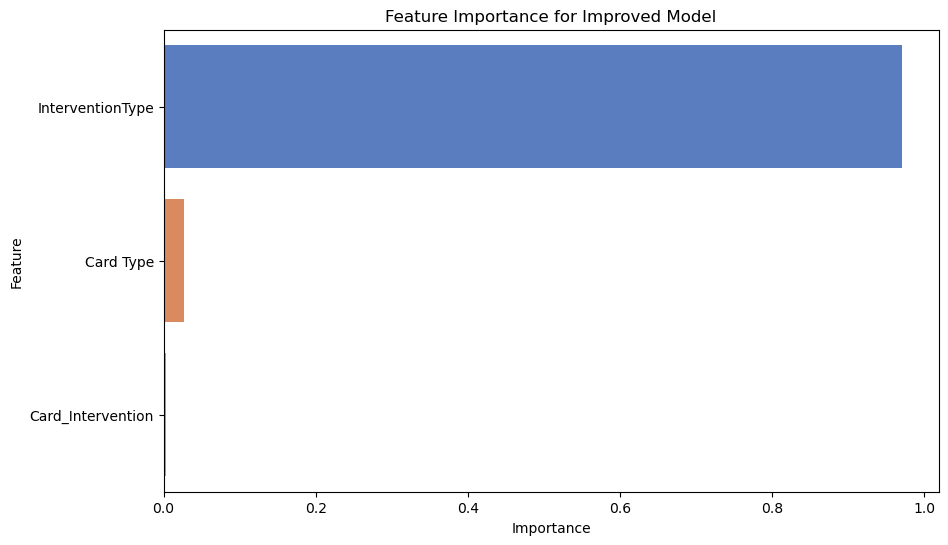

In [17]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# Add new interaction features
data['Card_Intervention'] = data['Card Type'] * data['InterventionType']

# Update feature list
features = ['Card Type', 'InterventionType', 'Card_Intervention']
X = data[features]

# Apply SMOTE to handle class imbalance
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize Gradient Boosting model for further improvement
model = GradientBoostingClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Improved Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)

# Calculate feature importances
feature_importances = best_model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance for Improved Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Improved Model Evaluation Metrics:
Accuracy: 0.60
Precision: 0.59
Recall: 0.61
F1 Score: 0.60
ROC-AUC Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      2463
           1       0.59      0.61      0.60      2315

    accuracy                           0.60      4778
   macro avg       0.60      0.60      0.60      4778
weighted avg       0.60      0.60      0.60      4778



C:\Users\surya\AppData\Local\Temp\ipykernel_30632\3545363436.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


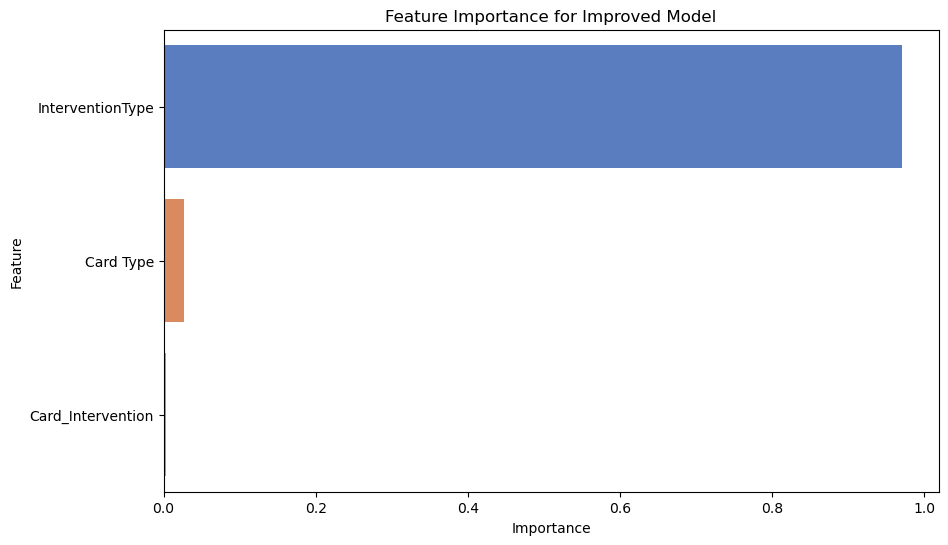

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])
data['InterventionType'] = label_encoder.fit_transform(data['InterventionType'])

# Add new interaction features
data['Card_Intervention'] = data['Card Type'] * data['InterventionType']

# Update feature list
features = ['Card Type', 'InterventionType', 'Card_Intervention']
target = 'Exited'

X = data[features]
y = data[target]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Improved Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)

# Calculate feature importances
feature_importances = best_model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance for Improved Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Improved Model with Gradient Boosting Classifier

In [25]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
#Encoding Categorical Variables
# Encode categorical variables
label_encoder = LabelEncoder()
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])
data['InterventionType'] = label_encoder.fit_transform(data['InterventionType'])


In [31]:
# Add new interaction features
data['Card_Intervention'] = data['Card Type'] * data['InterventionType']


In [33]:
# Update feature list
features = ['Card Type', 'InterventionType', 'Card_Intervention']
target = 'Exited'

X = data[features]
y = data[target]


In [35]:
#Handling Class Imbalance with SMOTE
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [39]:
#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [41]:
#Initializing and Tuning the Gradient Boosting Model
model = GradientBoostingClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [43]:
#Making Predictions and Evaluating the Model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Improved Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)


Improved Model Evaluation Metrics:
Accuracy: 0.60
Precision: 0.59
Recall: 0.61
F1 Score: 0.60
ROC-AUC Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      2463
           1       0.59      0.61      0.60      2315

    accuracy                           0.60      4778
   macro avg       0.60      0.60      0.60      4778
weighted avg       0.60      0.60      0.60      4778



C:\Users\surya\AppData\Local\Temp\ipykernel_30632\4170650247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


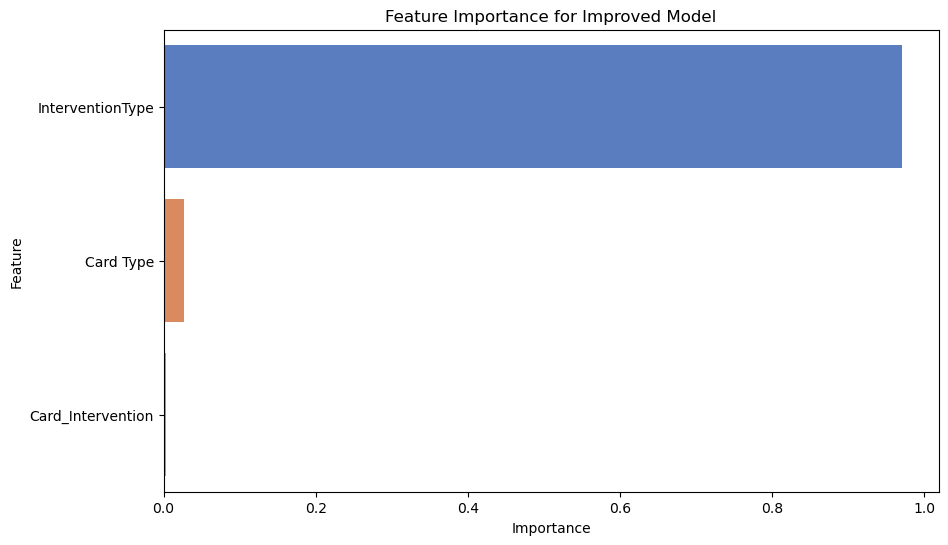

In [45]:
#Calculating and Visualizing Feature Importances
feature_importances = best_model.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance for Improved Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Customer Churn Prediction Using XGBoost Classifier with Hyperparameter Tuning and Evaluation

In [63]:
df = pd.read_csv('C:/Users/surya/Downloads/Train_data.csv')
print(df.columns)


Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'ReceivedPromotion',
       'AgeGroup', 'InterventionType'],
      dtype='object')


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Preprocessing the Data
categorical_features = ['Geography', 'Gender', 'Card Type', 'InterventionType', 'AgeGroup']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [69]:
#Dropping Unnecessary Columns
columns_to_drop = ['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'Exited']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Select features and target variable
features = df.columns.drop(columns_to_drop)
target = 'Exited'

X = df[features]
y = df[target]


In [71]:
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [73]:
#Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


C:\Users\surya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
#Training the Best Model
# Train the XGBoost classifier with the best hyperparameters
best_xgb = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, y_train)



C:\Users\surya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [77]:
#Making Predictions and Evaluating the Model
# Make predictions on the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)


Model Evaluation Metrics:
Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Example of Feature Engineering for Customer Churn Prediction

In [81]:
# Feature Engineering example
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
df['TenureByAge'] = df['Tenure'] / df['Age']
df['CreditScoreGivenAge'] = df['CreditScore'] / df['Age']


Customer Churn Prediction Using LightGBM Classifier with Hyperparameter Tuning and Evaluation

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
# Display the column names to identify the correct categorical columns
print(df.columns)

# Replace whitespaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')


Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'ReceivedPromotion',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER',
       'InterventionType_InactivePromotion',
       'InterventionType_MembershipAdjust', 'InterventionType_ReducedFees',
       'AgeGroup_30-39', 'AgeGroup_40-49', 'AgeGroup_50-59', 'AgeGroup_60-69',
       'AgeGroup_70+', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge'],
      dtype='object')


In [88]:
#Selecting Features and Target Variable

columns_to_drop = ['Unnamed:_0', 'RowNumber', 'CustomerId', 'Surname', 'Exited']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Select features and target variable
features = df.columns.drop(columns_to_drop)
target = 'Exited'

X = df[features]
y = df[target]

columns_to_drop = ['Unnamed:_0', 'RowNumber', 'CustomerId', 'Surname', 'Exited']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Select features and target variable
features = df.columns.drop(columns_to_drop)
target = 'Exited'

X = df[features]
y = df[target]


In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [92]:
# Define the parameter grid for Grid Search
param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize the LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Initialize Grid Search with Cross-Validation for LightGBM
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the Grid Search to the training data
grid_search_lgbm.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lgbm = grid_search_lgbm.best_params_
print("Best hyperparameters for LightGBM:", best_params_lgbm)


Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[LightGBM] [Info] Number of positive: 1454, number of negative: 5546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207714 -> initscore=-1.338759
[LightGBM] [Info] Start training from score -1.338759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [93]:
# Train the LightGBM classifier with the best hyperparameters
best_lgbm = LGBMClassifier(**best_params_lgbm, random_state=42)
best_lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1454, number of negative: 5546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207714 -> initscore=-1.338759
[LightGBM] [Info] Start training from score -1.338759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=4,
               random_state=42, subsample=0.7)

In [94]:
# Make predictions on the test set
y_pred_lgbm = best_lgbm.predict(X_test)
y_pred_proba_lgbm = best_lgbm.predict_proba(X_test)[:, 1]

# Evaluate the LightGBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)

# Display the evaluation metrics for LightGBM
print("Model Evaluation Metrics for LightGBM:")
print(f"Accuracy: {accuracy_lgbm:.2f}")
print(f"Precision: {precision_lgbm:.2f}")
print(f"Recall: {recall_lgbm:.2f}")
print(f"F1 Score: {f1_lgbm:.2f}")
print(f"ROC-AUC Score: {roc_auc_lgbm:.2f}")
print("\nClassification Report:")
print(classification_rep_lgbm)


Model Evaluation Metrics for LightGBM:
Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Best hyperparameters for KNN: {'kneighborsclassifier__n_neighbors': 3}
Model Evaluation Metrics for KNN:
Accuracy: 0.97
Precision: 0.99
Recall: 0.87
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2416
           1       0.99      0.87      0.93       584

    accuracy                           0.97      3000
   macro avg       0.98      0.93      0.95      3000
weighted avg       0.97      0.97      0.97      3000



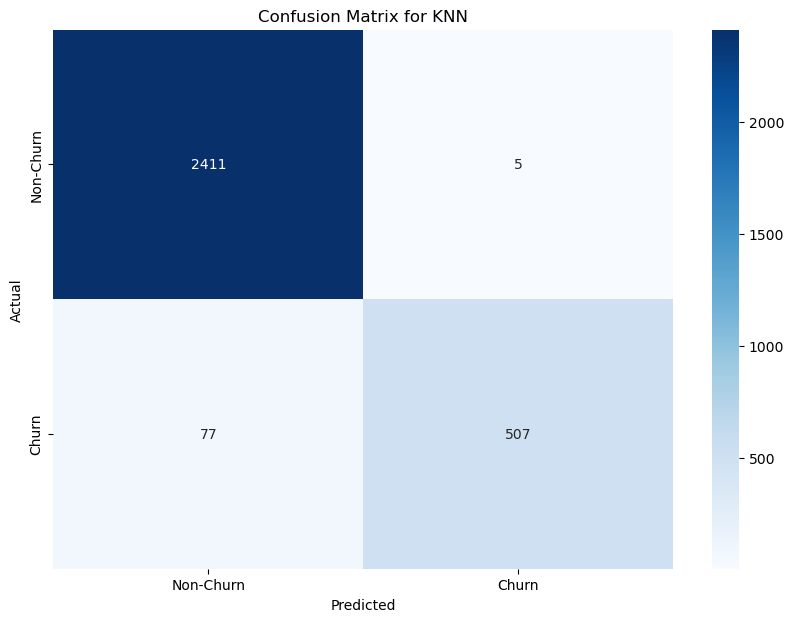

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
# For example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that standardizes the data then trains the KNN model
scale_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define the parameter grid for the number of neighbors
param_grid = {"kneighborsclassifier__n_neighbors": np.arange(1, 26, 2)}

# Initialize Grid Search with Cross-Validation
knn_model = GridSearchCV(scale_knn, param_grid=param_grid, cv=5)

# Fit the Grid Search to the training data
knn_model.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = knn_model.best_params_
print("Best hyperparameters for KNN:", best_params_knn)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Display the evaluation metrics for KNN
print("Model Evaluation Metrics for KNN:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print("\nClassification Report:")
print(classification_rep_knn)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()
